---
## Step 0: Load The Data

In [3]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "/Users/wangrui/Desktop/review/project2/data/train.p"
testing_file = "/Users/wangrui/Desktop/review/project2/data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
print(X_train.shape)
print(y_train.shape)

(39209, 32, 32, 3)
(39209,)


### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

5
[16, 1, 38, 33, 11, 18, 12, 25, 35, 7, 23, 4, 9, 21, 20, 27, 3, 13, 10, 5, 17, 34, 2, 8, 30, 24, 15, 26, 28, 22, 14, 32, 29, 6, 36, 40, 41, 31, 19, 0, 39, 42, 37]
Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


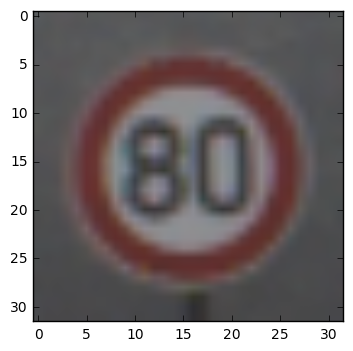

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure()
plt.imshow(image, cmap="gray")
print(y_train[index])


# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:len(X_train)-1]

# TODO: How many unique classes/labels there are in the dataset.
output = []
for x in y_test:
    if x not in output:
        output.append(x)
#print(len(output))
n_classes = len(output)
print(output)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

### Include an exploratory visualization of the dataset

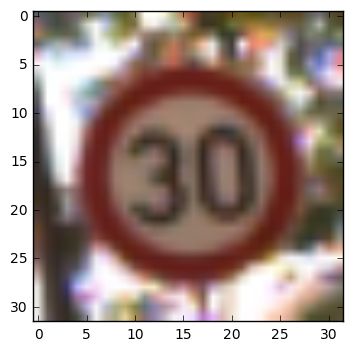

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
a = X_train[331,:,:,:]
plt.imshow(a)
plt.show()


----

## Step 2: Design and Test a Model Architecture


### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import tensorflow as tf
import numpy as np
from tensorflow.contrib.layers import flatten

X_train = (255 - X_train)/255
X_test = (255 - X_test)/255

print(X_train[0].shape)
print(X_test[0].shape)



(32, 32, 3)
(32, 32, 3)


### Split Data into Training, Validation and Testing Sets

In [7]:
# make validation sets 
from sklearn.utils import shuffle
import math as m
val_index = m.ceil(20*X_train.shape[0]/100)
end=X_train.shape[0]

X_train, y_train = shuffle(X_train, y_train)

X_validation,y_validation=X_train[0:val_index], y_train[0:val_index]
X_train,y_train=X_train[val_index+1:end], y_train[val_index+1:end]

print("Number of Validation samples =", X_validation.shape[0])
print("Number of Training samples =", X_train.shape[0])



Number of Validation samples = 7842
Number of Training samples = 31366


### Model Architecture

In [13]:
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = tf.constant(0,dtype=tf.float32)
    sigma = tf.constant(0.1,dtype=tf.float32)
    #
    weights = {
    'wc1': tf.Variable(tf.truncated_normal([5, 5, 3, 10], mean=mu, stddev=sigma)),
    'wc2': tf.Variable(tf.truncated_normal([5, 5, 10, 25], mean=mu, stddev=sigma)),
    'wd1': tf.Variable(tf.truncated_normal([5*5*25, 120], mean=mu, stddev=sigma)),    
    'wd2': tf.Variable(tf.truncated_normal([120, 84], mean=mu, stddev=sigma)),
    'wd3': tf.Variable(tf.truncated_normal([84,43], mean=mu, stddev=sigma))
    }

    biases = {
    'bc1': tf.Variable(tf.truncated_normal([10])),
    'bc2': tf.Variable(tf.truncated_normal([25])),
    'bd1': tf.Variable(tf.truncated_normal([120])),
    'bd2': tf.Variable(tf.truncated_normal([84])),
    'bd3': tf.Variable(tf.truncated_normal([43]))
    }
    
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x10.
    print(x)
    #input = tf.placeholder(tf.float32, shape=[None,32, 32, 1])
    conv_layer_1 = tf.nn.conv2d(x, weights['wc1'], strides=[1,1,1,1], padding='VALID')
    conv_layer_1 = tf.nn.bias_add(conv_layer_1, biases['bc1'])
    print(conv_layer_1)
    # TODO: Activation.
    
    conv_layer_1 = tf.nn.relu(conv_layer_1)

    # TODO: Pooling. Input = 28x28x10. Output = 14x14x10.
    
    pooling_1 = tf.nn.max_pool(conv_layer_1, [1,2,2,1], [1,2,2,1], padding='SAME')
    print(pooling_1)
    # TODO: Layer 2: Convolutional. Output = 10x10x25.
    
    conv_layer_2 = tf.nn.conv2d(pooling_1, weights['wc2'], strides=[1,1,1,1], padding='VALID')
    conv_layer_2 = tf.nn.bias_add(conv_layer_2, biases['bc2'])
    print(conv_layer_2)
    # TODO: Activation.
    
    conv_layer_2 = tf.nn.relu(conv_layer_2)

    # TODO: Pooling. Input = 10x10x25. Output = 5x5x25.
    
    pooling_2 = tf.nn.max_pool(conv_layer_2, [1,2,2,1], [1,2,2,1], padding='SAME')
    print(pooling_2)
    # TODO: Flatten. Input = 5x5x25. Output = 400.
    
    #fc1 = tf.reshape(pooling_2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = flatten(pooling_2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    
    # TODO: Activation.
    
    fc1 = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    
    fc2 = tf.add(tf.matmul(fc1, weights['wd2']), biases['bd2'])
    
    # TODO: Activation.
    
    fc2 = tf.nn.relu(fc2)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    
    logits = tf.add(tf.matmul(fc2, weights['wd3']), biases['bd3'])
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [ ]:

### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    EPOCHS = 5
    BATCH_SIZE = 150
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    EPOCHS_plt=[]
    validation_accuracy_plt=[]
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(train_op, feed_dict={x: batch_x, y: batch_y})    
        validation_accuracy = eval_data(X_validation, y_validation)
        
        validation_accuracy_plt.append(validation_accuracy) 
        EPOCHS_plt.append(i+1)
        
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
    
    with tf.Session() as sess:
    #saver.restore(sess, 'test.meta')
        Test_accuracy = eval_data(X_test,y_test)
        print("Test Set Accuracy = {:.3f}".format(Test_accuracy))
        print()
        
    import numpy as np
    import matplotlib.pyplot as plt
    plt.plot(EPOCHS_plt,validation_accuracy_plt, 'ro')
    plt.axis([0, np.max(EPOCHS_plt), 0, 1])
    plt.title('Training Accuracy')
    plt.xlabel('EPOCHS')
    plt.ylabel('Validation Accuracy')
    plt.show()

    saver.save(sess, './traffic_v1')
    print("Model saved")
    


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:

import tensorflow as tf
#saver = tf.train.Saver()
with tf.Session() as sess:
    #saver.restore(sess, 'test.meta')
    Test_accuracy = eval_data(X_test,y_test)
    print("Test Set Accuracy = {:.3f}".format(Test_accuracy))
    print()


### Predict the Sign Type for Each Image

In [25]:
import tensorflow as tf
import numpy as np
import matplotlib.image as mpimg

imgs = ['20_tn.jpg','30_tn.jpg', '39_tn.jpg', '50_tn.jpg', '70_tn.jpg','80_tn.jpg' ,'exclamation_tn.jpg', 'leftturn_tn.jpg', 'twocars_tn.jpg', 'priority_tn.jpg', 'uturn_tn.jpg']

new_input = np.zeros((len(imgs),32,32,3))
a = 0
# transform into the form of none, 32, 32, 3
for imgname in imgs:
    image = mpimg.imread(imgname)
    image = (255-image)/255
    new_input[a,:,:,:] = image
    a += 1
print(len(new_input))
print(new_input.shape)

    

11
(11, 32, 32, 3)


### Analyze Performance

TopKV2(values=array([[ 0.98431891],
       [ 0.8991152 ],
       [ 0.7477299 ],
       [ 0.71629423],
       [ 0.99861348],
       [ 0.56407028],
       [ 0.99989104],
       [ 0.99761617],
       [ 0.46813577],
       [ 0.73516452],
       [ 0.69742161]], dtype=float32), indices=array([[13],
       [ 1],
       [23],
       [ 2],
       [ 2],
       [ 2],
       [18],
       [39],
       [ 7],
       [ 3],
       [25]], dtype=int32))


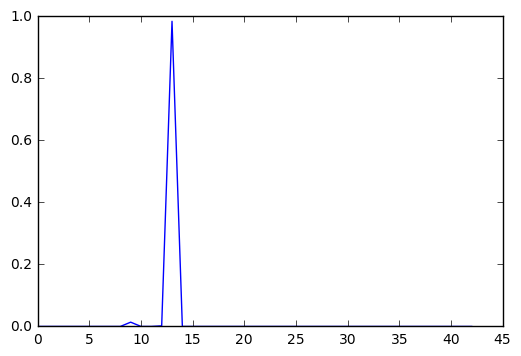

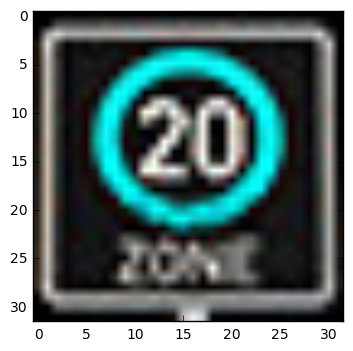

In [26]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% acc
import numpy as np
with tf.Session() as sess:
    saver.restore(sess, './traffic_v1')
    [res, topk] = sess.run([tf.nn.softmax(logits), tf.nn.top_k(tf.nn.softmax(logits), k=1)], feed_dict = {x: new_input})
    classes = np.arange(43)
    print(topk)
    plt.figure()
    plt.plot(classes,res[0])
    plt.figure()
    plt.imshow(new_input[0])
    plt.show()
        
        
        
        
        
        
        
                           

39209 32 32 3
39209
(32, 32, 3)
(32, 32, 3)
Number of Validation samples = 7842
Number of Training samples = 31366
Tensor("Placeholder_3:0", shape=(?, 32, 32, 3), dtype=float32)
Tensor("BiasAdd:0", shape=(?, 28, 28, 10), dtype=float32)
Tensor("MaxPool_2:0", shape=(?, 14, 14, 10), dtype=float32)
Tensor("BiasAdd_1:0", shape=(?, 10, 10, 25), dtype=float32)
Tensor("MaxPool_3:0", shape=(?, 5, 5, 25), dtype=float32)
Training...

EPOCH 1 ...
Validation Accuracy = 0.399

EPOCH 2 ...
Validation Accuracy = 0.745

EPOCH 3 ...
Validation Accuracy = 0.843

EPOCH 4 ...
Validation Accuracy = 0.885

EPOCH 5 ...
Validation Accuracy = 0.901



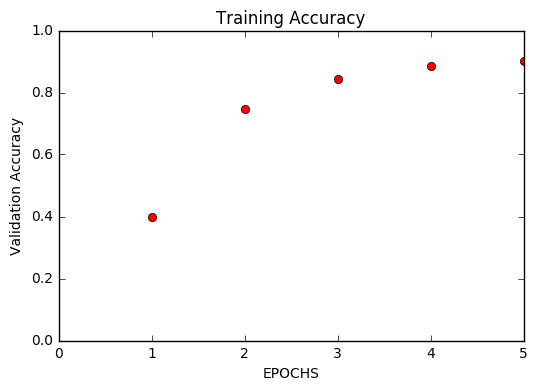

Model saved


In [22]:
# %load ref.py combine all of these together
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "/Users/wangrui/Desktop/review/project2/data/train.p"
testing_file = "/Users/wangrui/Desktop/review/project2/data/test.p"


with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
print(X_train.shape[0],X_train.shape[1],X_train.shape[2],X_train.shape[3])
print(y_train.shape[0])

n_train = len(train['features']) #Initially kept as 1000 for checking & correcting the syntax errors - Validation accuracy was too low

# TODO: Number of testing examples.
n_test = len(test['features'])

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

X_train=(255-X_train)/255 #Normalising the Training Data between 0 to 1
print(X_train[0].shape)

X_test=(255-X_test)/255 #Normalising the test data too.
print(X_test[0].shape)

from sklearn.utils import shuffle
import math as m


val_index=m.ceil(20*X_train.shape[0]/100); #Taking 20% Data for Validation
#test_index=m.ceil(10*X_train.shape[0]/100); #Taking 10% Data in the Training set as an undiluted Test set.
#This is needed only if there is not test data. Since we have the test.p as seperate test data, we neednot split the training data

end=X_train.shape[0]

X_train, y_train = shuffle(X_train, y_train)

X_validation,y_validation=X_train[0:val_index], y_train[0:val_index]
X_train,y_train=X_train[val_index+1:end], y_train[val_index+1:end]

print("Number of Validation samples =", X_validation.shape[0])
print("Number of Training samples =", X_train.shape[0])

import tensorflow as tf

EPOCHS = 5
BATCH_SIZE = 150
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = tf.constant(0,dtype=tf.float32)
    sigma = tf.constant(0.1,dtype=tf.float32)
    #
    weights = {
    'wc1': tf.Variable(tf.truncated_normal([5, 5, 3, 10], mean=mu, stddev=sigma)),
    'wc2': tf.Variable(tf.truncated_normal([5, 5, 10, 25], mean=mu, stddev=sigma)),
    'wd1': tf.Variable(tf.truncated_normal([5*5*25, 120], mean=mu, stddev=sigma)),    
    'wd2': tf.Variable(tf.truncated_normal([120, 84], mean=mu, stddev=sigma)),
    'wd3': tf.Variable(tf.truncated_normal([84,43], mean=mu, stddev=sigma))
    }

    biases = {
    'bc1': tf.Variable(tf.truncated_normal([10])),
    'bc2': tf.Variable(tf.truncated_normal([25])),
    'bd1': tf.Variable(tf.truncated_normal([120])),
    'bd2': tf.Variable(tf.truncated_normal([84])),
    'bd3': tf.Variable(tf.truncated_normal([43]))
    }
    
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x10.
    print(x)
    #input = tf.placeholder(tf.float32, shape=[None,32, 32, 1])
    conv_layer_1 = tf.nn.conv2d(x, weights['wc1'], strides=[1,1,1,1], padding='VALID')
    conv_layer_1 = tf.nn.bias_add(conv_layer_1, biases['bc1'])
    print(conv_layer_1)
    # TODO: Activation.
    
    conv_layer_1 = tf.nn.relu(conv_layer_1)

    # TODO: Pooling. Input = 28x28x10. Output = 14x14x10.
    
    pooling_1 = tf.nn.max_pool(conv_layer_1, [1,2,2,1], [1,2,2,1], padding='SAME')
    print(pooling_1)
    # TODO: Layer 2: Convolutional. Output = 10x10x25.
    
    conv_layer_2 = tf.nn.conv2d(pooling_1, weights['wc2'], strides=[1,1,1,1], padding='VALID')
    conv_layer_2 = tf.nn.bias_add(conv_layer_2, biases['bc2'])
    print(conv_layer_2)
    # TODO: Activation.
    
    conv_layer_2 = tf.nn.relu(conv_layer_2)

    # TODO: Pooling. Input = 10x10x25. Output = 5x5x25.
    
    pooling_2 = tf.nn.max_pool(conv_layer_2, [1,2,2,1], [1,2,2,1], padding='SAME')
    print(pooling_2)
    # TODO: Flatten. Input = 5x5x25. Output = 400.
    
    #fc1 = tf.reshape(pooling_2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = flatten(pooling_2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    
    # TODO: Activation.
    
    fc1 = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    
    fc2 = tf.add(tf.matmul(fc1, weights['wd2']), biases['bd2'])
    
    # TODO: Activation.
    
    fc2 = tf.nn.relu(fc2)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    
    logits = tf.add(tf.matmul(fc2, weights['wd3']), biases['bd3'])
    
    return logits

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    EPOCHS_plt=[]
    validation_accuracy_plt=[]
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})    
        validation_accuracy = evaluate(X_validation, y_validation)
        
        validation_accuracy_plt.append(validation_accuracy) 
        EPOCHS_plt.append(i+1)
        
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    import numpy as np
    import matplotlib.pyplot as plt
    plt.plot(EPOCHS_plt,validation_accuracy_plt, 'ro')
    plt.axis([0, np.max(EPOCHS_plt), 0, 1])
    plt.title('Training Accuracy')
    plt.xlabel('EPOCHS')
    plt.ylabel('Validation Accuracy')
    plt.show()

    saver.save(sess, './traffic_v1')
    print("Model saved")





















